# Metro Train Systems around the Globe 

This project is a basic analysis of data related to metro systems all over the world. It offers data cleaning, if required, different analytical summaries and visualizations. 

In [1]:
## necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('white')

## Data 

In [157]:
df= pd.read_csv('metro_countries_cities.csv')
print('Shape- ',df.shape)
print('\n')
print('Datatypes count- ','\n',df.dtypes.value_counts())
df.sample(5)

Shape-  (198, 9)


Datatypes count-  
 object     4
int64      4
float64    1
dtype: int64


,city,country,name,year,year_last_expansion,stations,length_km,annual_ridership_mill,region
128,Gwangju,South Korea,Gwangju Metro,2004,2008,20,201,19.00,asia
168,Adana,Turkey,Adana Metro,2009,2010,13,139,14.00,asia
34,Hefei,China,Hefei Metro,2016,2021,122,1562,195.07,asia
73,Rennes,France,Rennes Metro,2002,2002,15,94,37.20,europe
24,Chengdu,China,Chengdu Metro,2010,2020,285,5192,1800.00,asia


### Statistical inferences 

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,198.0,1987.858586,31.617161,1890.0,1976.000,1995.50,2012.750,2022.00
year_last_expansion,198.0,2014.565657,13.167921,1896.0,2014.000,2019.00,2021.000,2022.00
stations,198.0,68.939394,76.200753,6.0,21.000,41.00,90.750,424.00
length_km,198.0,1506.595960,4900.037419,12.0,175.000,392.00,1001.250,49039.00
annual_ridership_mill,198.0,263.254980,482.654133,0.0,24.025,92.95,247.925,2834.69


In [156]:
df.describe(include=object).T

,count,unique,top,freq
city,198,187,Seoul,3
country,198,59,China,43
name,198,198,Algiers Metro,1
region,198,6,asia,117


## Data Pre-processing Steps 

### Null values, if any 

In [3]:
df.isna().sum()

city                     0
country                  0
name                     0
year                     0
year_last_expansion      0
stations                 0
length_km                0
annual_ridership_mill    0
region                   0
dtype: int64

### Duplicated Rows 

In [4]:
df.duplicated().sum()

0

## Data Summaries and Analysis

### 1. Countries with most number of Metro Systems 

In [9]:
country= df['country'].value_counts().head(10)

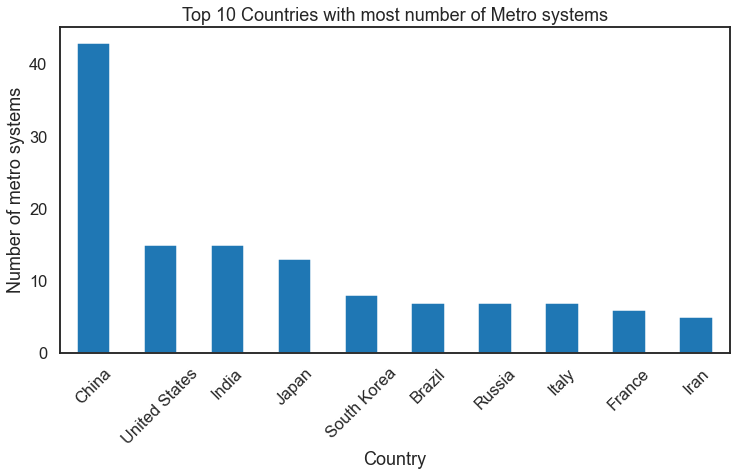

In [59]:
plt.figure(figsize=(12,6))
ax= country.plot(kind='bar')
ax.set(xlabel='Country',
      ylabel= 'Number of metro systems',
      title= 'Top 10 Countries with most number of Metro systems')
plt.xticks(rotation=45);

### 2. Timeline of systems developed by top 5 countries

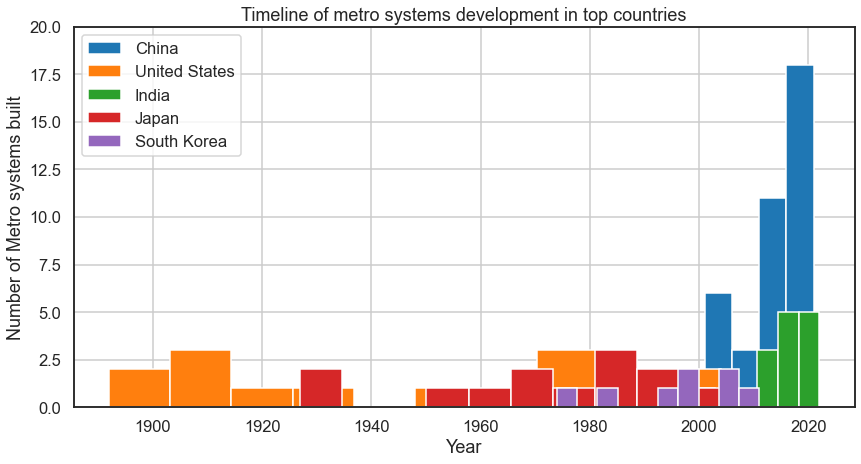

In [151]:
plt.figure(figsize=(14,7))
for n in cntry:
   df[df['country']==n]['year'].hist()
   plt.legend(cntry)
   plt.xlabel('Year')
   plt.ylabel('Number of Metro systems built')
   plt.title('Timeline of metro systems development in top countries')
   plt.ylim(0,20);

### 3. Oldest Metro Systems

In [76]:
oldest_sys= df[['country','name','year']].sort_values(by='year').head(10)
oldest_sys

,country,name,year
178,United Kingdom,London Underground,1890
183,United States,"Chicago ""L""",1892
177,United Kingdom,Glasgow Subway,1896
81,Hungary,Budapest Metro,1896
72,France,Paris Métro,1900
182,United States,MBTA subway,1901
76,Germany,Berlin U-Bahn,1902
80,Greece,Athens Metro,1904
187,United States,New York City Subway,1904
190,United States,SEPTA,1907


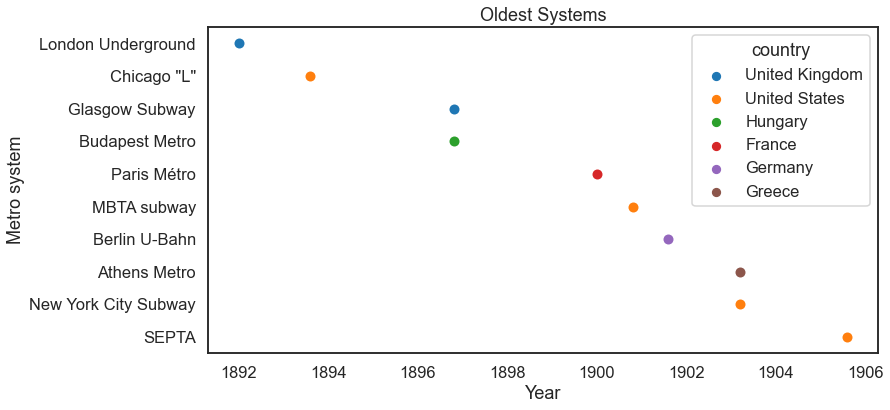

In [81]:
plt.figure(figsize=(12,6))
ax= sns.swarmplot(x='year',y='name',data= oldest_sys,size=10,hue='country')
ax.set(xlabel= 'Year', 
      ylabel='Metro system',
      title= 'Oldest Systems')
ax.set_xticklabels(range(1890,1908,2));

### 4. Systems with highest number of stations

In [83]:
sttns= df[['country','name','stations']].sort_values(by='stations',ascending=False).head(10)
sttns

,country,name,stations
187,United States,New York City Subway,424
46,China,Shanghai Metro,396
20,China,Beijing Subway,366
130,South Korea,Seoul Metropolitan Subway,339
72,France,Paris Métro,306
30,China,Guangzhou Metro,290
49,China,Shenzhen Metro,288
24,China,Chengdu Metro,285
178,United Kingdom,London Underground,272
56,China,Wuhan Metro,247


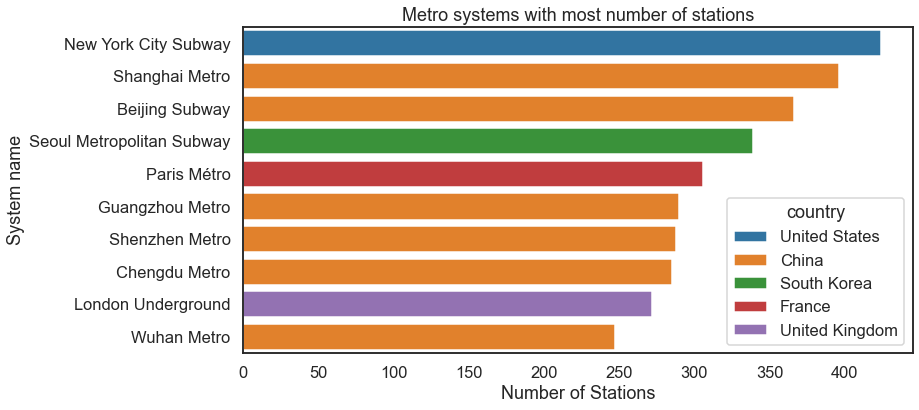

In [87]:
plt.figure(figsize=(12,6))
ax= sns.barplot(x='stations',y='name',hue='country', data= sttns, dodge= False)
ax.set(xlabel='Number of Stations', 
       ylabel= 'System name',
      title= 'Metro systems with most number of stations');

### 5. Longest Networks

In [158]:
lngst= df[['country','name','length_km']].sort_values(by='length_km',ascending=False).head(10)
lngst

,country,name,length_km
35,China,Hohhot Metro,49039
85,India,Delhi Metro,34812
60,China,Xi'an Metro,26638
26,China,Dalian Metro,20103
169,Turkey,Ankara Metro,6436
61,China,Xuzhou Metro,6435
29,China,Fuzhou Metro,5972
30,China,Guangzhou Metro,5894
23,China,Changzhou Metro,5421
24,China,Chengdu Metro,5192


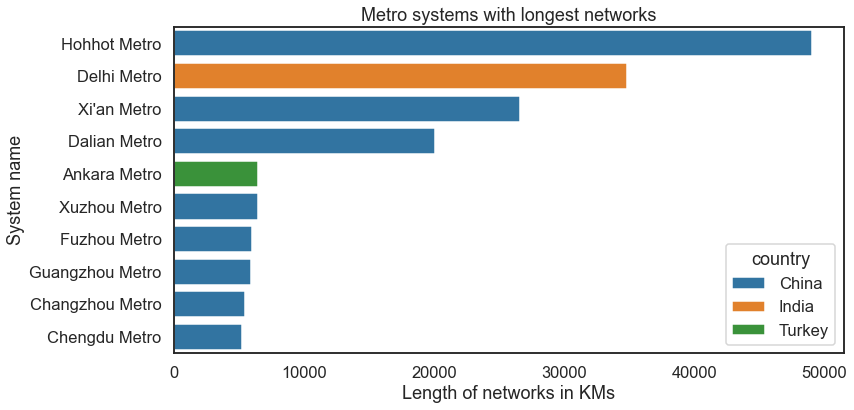

In [159]:
plt.figure(figsize=(12,6))
ax= sns.barplot(x='length_km',y='name',hue='country', data= lngst, dodge= False)
ax.set(xlabel='Length of networks in KMs', 
       ylabel= 'System name',
      title= 'Metro systems with longest networks');

### 5. Busiest Systems around the Globe 

In [95]:
bsy= df[['country','name','annual_ridership_mill']].sort_values(by='annual_ridership_mill',ascending=False).head(10)
bsy

,country,name,annual_ridership_mill
46,China,Shanghai Metro,2834.69
119,Japan,Tokyo Metro,2757.40
30,China,Guangzhou Metro,2415.60
20,China,Beijing Subway,2292.65
130,South Korea,Seoul Metropolitan Subway,2127.20
24,China,Chengdu Metro,1800.00
85,India,Delhi Metro,1790.00
49,China,Shenzhen Metro,1626.73
150,Russia,Moscow Metro,1618.20
67,Egypt,Cairo Metro,1314.00


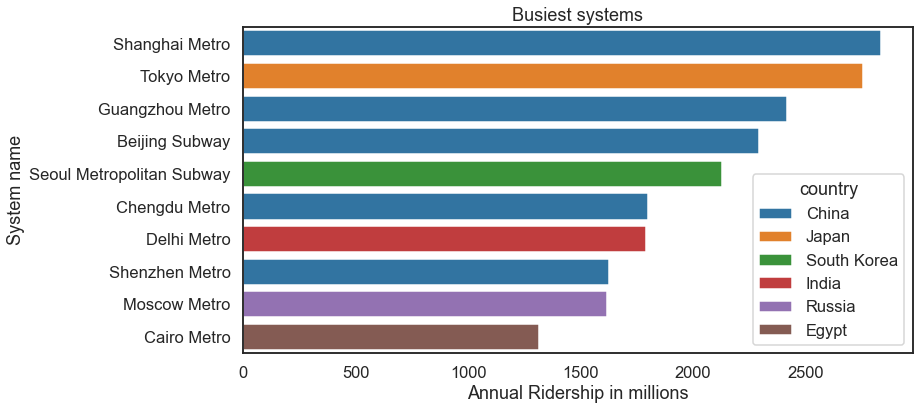

In [96]:
plt.figure(figsize=(12,6))
ax= sns.barplot(x='annual_ridership_mill',y='name',hue='country', data= bsy, dodge= False)
ax.set(xlabel='Annual Ridership in millions', 
       ylabel= 'System name',
      title= 'Busiest systems');

### 6. Timeline of number of systems built in different regions  

In [146]:
reg= list(df['region'].unique())

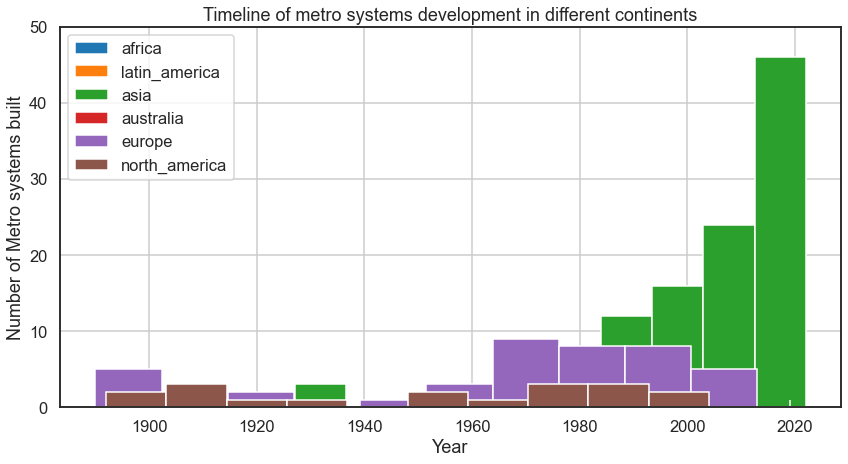

In [149]:
plt.figure(figsize=(14,7))

for n in reg:
    df[df['region']==n]['year'].hist()
    plt.legend(reg)
    plt.xlabel('Year')
    plt.ylabel('Number of Metro systems built')
    plt.title('Timeline of metro systems development in different continents')
    plt.ylim(0,50);

## Conclusion
In the conclusion, it is apparent that after the year 2000 most of developed countries halted further development of metro systems. And reasons could be an early developmental phase in their part of world, we can see in the project that developed countries started building their metro networks in early 1900s, another reason could be sufficient number of systems with respect to their population and country size. On the other hand, if we follow developing part of world primarily China and India, it is noteable that these countries had a late start i.e. they came into play after 1970 and this could be a reason behind constant growth of their metro systems' infrastructure till today keeping in mind their huge population and country size.

If we see region wise development then Asia dominates the list of most number of metro systems and it is due to countries like China and India both of them are major contributors with 43 and 15 networks respectively. 
The rise of China and India after 1980s is major highlight of the project.